In [1]:
# import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Transactions.csv')# load the data
print(data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [49]:
print(data.describe())
print(data.head())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price    Month  
0      300.68  300.68  2024-08  
1      300.68  300.68  2024-05  
2      300.68  300.68  2024-04  
3      601.36  300.68  2024-03  
4      902.04  300

In [8]:
duplicates = data.duplicated().sum()

In [9]:
# Check for unique counts of categorical columns and date range
unique_counts = {
    "TransactionID": data["TransactionID"].nunique(),
    "CustomerID": data["CustomerID"].nunique(),
    "ProductID": data["ProductID"].nunique()
}

In [10]:
# Convert TransactionDate to datetime to analyze time-based trends
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
date_range = data["TransactionDate"].min(), data["TransactionDate"].max()

In [11]:
# Distribution of Quantity and TotalValue
quantity_dist = data["Quantity"].value_counts()
price_distribution = data["Price"].describe()

In [12]:
unique_counts, date_range, quantity_dist, price_distribution

({'TransactionID': 1000, 'CustomerID': 199, 'ProductID': 100},
 (Timestamp('2023-12-30 15:29:12'), Timestamp('2024-12-28 11:00:00')),
 4    261
 3    254
 2    246
 1    239
 Name: Quantity, dtype: int64,
 count    1000.00000
 mean      272.55407
 std       140.73639
 min        16.08000
 25%       147.95000
 50%       299.93000
 75%       404.40000
 max       497.76000
 Name: Price, dtype: float64)

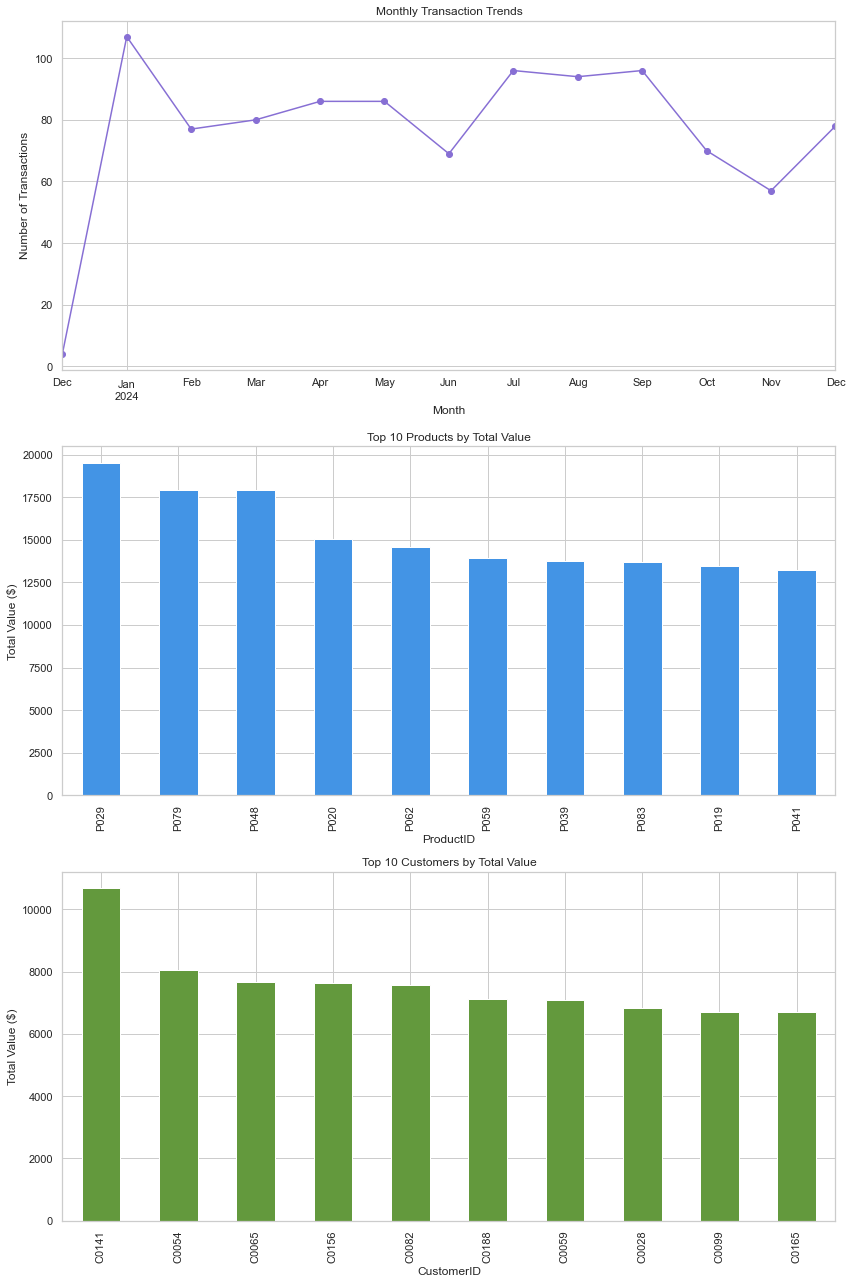

In [48]:
sns.set(style="whitegrid")

# Monthly transaction trends
data["Month"] = data["TransactionDate"].dt.to_period("M")
monthly_trends = data.groupby("Month").size()

# Top 10 Products by TotalValue
top_products = data.groupby("ProductID")["TotalValue"].sum().sort_values(ascending=False).head(10)

# Top 10 Customers by TotalValue
top_customers = data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Monthly trends
monthly_trends.plot(kind="line", ax=axes[0], marker="o", color="#876FD4")
axes[0].set_title("Monthly Transaction Trends")
axes[0].set_ylabel("Number of Transactions")
axes[0].set_xlabel("Month")

# Top 10 Products
top_products.plot(kind="bar", ax=axes[1], color="#4394E5")
axes[1].set_title("Top 10 Products by Total Value")
axes[1].set_ylabel("Total Value ($)")
axes[1].set_xlabel("ProductID")

# Top 10 Customers
top_customers.plot(kind="bar", ax=axes[2], color="#63993D")
axes[2].set_title("Top 10 Customers by Total Value")
axes[2].set_ylabel("Total Value ($)")
axes[2].set_xlabel("CustomerID")

plt.tight_layout()
plt.show()
